<a href="https://colab.research.google.com/github/dina-masry/Student-Grade-Bias-Correction/blob/main/Students_grading_bias_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
path= '//content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/Students_Grading_Dataset_Biased.csv'
df= pd.read_csv(path)
pd.set_option('display.max_column',100)
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


##Discovering the dataset

In [ ]:
df.shape

(5000, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [ ]:
df.isna().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),516
Midterm_Score,0
Final_Score,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,21.05,1.99,18.00,19.00,21.00,23.00,24.00
Attendance (%),4484.0,75.43,14.37,50.01,63.26,75.72,87.47,100.00
Midterm_Score,5000.0,70.33,17.21,40.00,55.46,70.51,84.97,99.98
Final_Score,5000.0,69.64,17.24,40.00,54.67,69.74,84.50,99.98
Assignments_Avg,4483.0,74.80,14.41,50.00,62.09,74.81,86.97,99.98
Quizzes_Avg,5000.0,74.91,14.50,50.03,62.49,74.69,87.63,99.96
Participation_Score,5000.0,4.98,2.89,0.00,2.44,4.96,7.50,10.00
Projects_Score,5000.0,74.92,14.42,50.01,62.32,74.98,87.37,100.00
Total_Score,5000.0,75.12,14.40,50.02,62.84,75.40,87.65,99.99
Study_Hours_per_Week,5000.0,17.66,7.28,5.00,11.40,17.50,24.10,30.00


In [ ]:
df.describe(include='object')

,Student_ID,First_Name,Last_Name,Email,Gender,Department,Grade,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,3206,5000
unique,5000,8,6,5000,2,4,5,2,2,4,3
top,S5999,Maria,Johnson,student4999@university.com,Male,CS,A,No,Yes,PhD,Low
freq,1,657,868,1,2551,2022,1495,3493,4485,820,1983


In [ ]:
df.nunique()/len(df)*100

,0
Student_ID,100.00
First_Name,0.16
Last_Name,0.12
Email,100.00
Gender,0.04
Age,0.14
Department,0.08
Attendance (%),59.60
Midterm_Score,68.18
Final_Score,67.42


In [ ]:
cat_cols= df.select_dtypes('object').columns
for col in cat_cols:
  print(f'Value counts in {col}\n')
  print(df[col].value_counts())
  print('-----------------------------------------------------------------')
  print('-----------------------------------------------------------------\n')

Value counts in Student_ID

Student_ID
S5999    1
S1000    1
S1001    1
S1002    1
S1003    1
        ..
S1012    1
S1011    1
S1010    1
S1009    1
S1008    1
Name: count, Length: 5000, dtype: int64
-----------------------------------------------------------------
-----------------------------------------------------------------

Value counts in First_Name

First_Name
Maria    657
Ahmed    651
Ali      644
Emma     628
Sara     612
John     608
Omar     601
Liam     599
Name: count, dtype: int64
-----------------------------------------------------------------
-----------------------------------------------------------------

Value counts in Last_Name

Last_Name
Johnson     868
Jones       850
Davis       829
Brown       825
Smith       817
Williams    811
Name: count, dtype: int64
-----------------------------------------------------------------
-----------------------------------------------------------------

Value counts in Email

Email
student4999@university.com    1
student0@uni

In [ ]:
df_copied = df.copy(deep= True)

## Set Student_ID as index

In [ ]:
df_copied =df_copied.set_index('Student_ID')
df_copied.head()

,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
Student_ID,,,,,,,,,,,,,,,,,,,,,,
S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


## Handling missing values

- fill missing values in parent_Educational_Level with 'Missing'

In [ ]:
df_copied['Parent_Education_Level'] = df_copied['Parent_Education_Level'].fillna('Missing')
df_copied['Parent_Education_Level'].isna().sum()

np.int64(0)

- fill missing values  in Assignments_Avg with median :

In [ ]:
df_copied['Assignments_Avg'] = df_copied['Assignments_Avg'].fillna(df_copied['Assignments_Avg'].median())
df_copied['Assignments_Avg'].isna().sum()

np.int64(0)

- fill missing values in Attendance with  median :

In [ ]:
df_copied['Attendance (%)']=df_copied['Attendance (%)'].fillna(df_copied['Attendance (%)'].median())
df_copied['Attendance (%)'].isna().sum()

np.int64(0)

In [ ]:
df_copied.isna().sum()

,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0
Assignments_Avg,0


## Discover duplicates rows

In [ ]:
df_copied.duplicated().sum()

np.int64(0)

- There is no duplicated rows

## Checking inconsistencies for cateogrical features

In [ ]:
cat_cols= df_copied.select_dtypes('object').columns
for col in cat_cols:
  print(col)
  print(df_copied[col].value_counts())
  print('-----------------------------------------------------------------\n')

First_Name
First_Name
Maria    657
Ahmed    651
Ali      644
Emma     628
Sara     612
John     608
Omar     601
Liam     599
Name: count, dtype: int64
-----------------------------------------------------------------

Last_Name
Last_Name
Johnson     868
Jones       850
Davis       829
Brown       825
Smith       817
Williams    811
Name: count, dtype: int64
-----------------------------------------------------------------

Email
Email
student4999@university.com    1
student0@university.com       1
student1@university.com       1
student2@university.com       1
student3@university.com       1
                             ..
student12@university.com      1
student11@university.com      1
student10@university.com      1
student9@university.com       1
student8@university.com       1
Name: count, Length: 5000, dtype: int64
-----------------------------------------------------------------

Gender
Gender
Male      2551
Female    2449
Name: count, dtype: int64
-------------------------------

##Check if number in email matches the Id ?

In [ ]:
df_copied = df_copied.reset_index()
df_copied.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,student,numbers,finalnum,rest
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,,0@university.com,0,university.com
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,74.81,94.24,8.32,55.65,50.64,A,19.0,No,Yes,Missing,Medium,4,9.0,,1@university.com,1,university.com
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2,,2@university.com,2,university.com
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7,,3@university.com,3,university.com
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1,,4@university.com,4,university.com


In [ ]:
def check_id_email_match (row):
  std_id_num = row['Student_ID'][1:] # remove S from the id
  if row['Student_ID'].startswith('S1'):
    std_id_num = std_id_num[1:] # remove the first 1
    std_id_num = std_id_num.lstrip('0') # remove 0 1002 -> 2 , 1008->8
    if std_id_num =='':
      std_id_num = '0'
  else:
   std_id_num = str(int(std_id_num) - 1000)  # '2000' -> '1000', '2001' -> '1001'
  #df_copied[['student','numbers']] = df_copied['Email'].str.split('student',expand =True)
  #df_copied[['finalnum','rest']] = df_copied['numbers'].str.split("@",expand= True)
  #email_num = df_copied['finalnum']
  # Extracts '8' from 'student8@university.com'
  email_num = row['Email'].split('student')[1].split('@')[0]

  return std_id_num == email_num


In [ ]:
df_copied['Match'] = df_copied.apply(check_id_email_match,axis=1)
df_copied['Match'].value_counts()

,count
Match,
True,5000


In [ ]:
grade_A= df_copied[df_copied['Grade']== 'A']
grade_A['Total_Score'].head()

,Total_Score
1,50.64
3,61.63
8,95.62
9,84.99
10,58.25


In [ ]:
grade_A['Total_Score'].describe()

,Total_Score
count,1495.000000
mean,74.435592
std,14.035800
min,50.020000
25%,62.565000
50%,74.500000
75%,86.090000
max,99.990000


## Grades and Total scores must be matched! let`s fix it

In [ ]:
total_scores_less_than_60= df_copied['Total_Score']<60
df_copied.loc[total_scores_less_than_60,['Grade']] = df_copied.loc[total_scores_less_than_60,['Grade']].replace(['A','B','C','D'],'F')

In [ ]:
total_scores_less_than_70= (df_copied['Total_Score']<70) & (df_copied['Total_Score']>=60)
df_copied.loc[total_scores_less_than_70,['Grade']] = df_copied.loc[total_scores_less_than_70,['Grade']].replace(['A','B','C','F'],'D')

In [ ]:
total_scores_less_than_80= (df_copied['Total_Score']<80) & (df_copied['Total_Score']>=70)
df_copied.loc[total_scores_less_than_80,['Grade']] = df_copied.loc[total_scores_less_than_80,['Grade']].replace(['A','B','D','F'],'C')

In [ ]:
total_scores_less_than_90= (df_copied['Total_Score']<90) & (df_copied['Total_Score']>=80)
df_copied.loc[total_scores_less_than_90,['Grade']] = df_copied.loc[total_scores_less_than_90,['Grade']].replace(['A','D','C','F'],'B')

In [ ]:
total_scores_less_than_100= (df_copied['Total_Score']<100) & (df_copied['Total_Score']>=90)
df_copied.loc[total_scores_less_than_100,['Grade']] = df_copied.loc[total_scores_less_than_100,['Grade']].replace(['F','B','C','D'],'A')

In [ ]:
df_copied.groupby('Grade')['Total_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Grade,,,,,,,,
A,988.0,94.987206,2.893469,90.00,92.5400,94.835,97.6150,99.99
B,1046.0,85.033050,2.943877,80.02,82.4700,85.015,87.6575,89.99
C,989.0,75.015399,2.877893,70.00,72.5000,75.040,77.5100,79.99
D,992.0,65.020978,2.849154,60.00,62.6675,65.010,67.4000,69.99
F,985.0,54.950305,2.918116,50.02,52.4100,54.870,57.5300,59.98


In [ ]:
df_copied.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'student', 'numbers', 'finalnum', 'rest',
       'Match'],
      dtype='object')

In [ ]:
df_copied = df_copied.drop(columns = ['student','numbers','finalnum','rest','Match'] )
df_copied.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

## Reset the index

In [ ]:
df_copied = df_copied.set_index('Student_ID')
df_copied.head()

,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
Student_ID,,,,,,,,,,,,,,,,,,,,,,
S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,74.81,94.24,8.32,55.65,50.64,F,19.0,No,Yes,Missing,Medium,4,9.0
S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,C,20.7,No,Yes,Master's,Low,6,6.2
S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,D,24.8,Yes,Yes,High School,High,3,6.7
S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,D,15.4,Yes,Yes,High School,High,2,7.1


In [ ]:
num_cols =df_copied.select_dtypes('number').columns
for col in num_cols:
  print(col)
  print(df_copied[col].describe())
  print('-----------------------------------------------------------------')

Age
count    5000.000000
mean       21.048400
std         1.989786
min        18.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        24.000000
Name: Age, dtype: float64
-----------------------------------------------------------------
Attendance (%)
count    5000.000000
mean       75.461708
std        13.610774
min        50.010000
25%        64.737500
50%        75.725000
75%        86.182500
max       100.000000
Name: Attendance (%), dtype: float64
-----------------------------------------------------------------
Midterm_Score
count    5000.000000
mean       70.326844
std        17.213209
min        40.000000
25%        55.457500
50%        70.510000
75%        84.970000
max        99.980000
Name: Midterm_Score, dtype: float64
-----------------------------------------------------------------
Final_Score
count    5000.000000
mean       69.640788
std        17.238744
min        40.000000
25%        54.667500
50%        69.735000
75%        84.500000
max    

- All numeric values are accepted

**I noticed that some boys name are considered as females , let`s fix that:**

In [ ]:
df_copied['First_Name'].value_counts()

,count
First_Name,
Maria,657
Ahmed,651
Ali,644
Emma,628
Sara,612
John,608
Omar,601
Liam,599


In [ ]:
males=['Ahmed','Ali','John','Omar','Liam']
females= ['Maria','Emma','Sara']

In [ ]:
def fix_gender(row):
  if row['First_Name'] in males and row['Gender'] !='Male':
    return 'Male'
  elif row['First_Name'] in females and row['Gender'] !='Female':
    return 'Female'
  return row['Gender']

In [ ]:
df_copied['Gender'] = df_copied.apply(fix_gender,axis=1)
df_copied.head(10)

,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
Student_ID,,,,,,,,,,,,,,,,,,,,,,
S1000,Omar,Williams,student0@university.com,Male,22,Engineering,52.290,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
S1001,Maria,Brown,student1@university.com,Female,18,Engineering,97.270,97.23,45.80,74.81,94.24,8.32,55.65,50.64,F,19.0,No,Yes,Missing,Medium,4,9.0
S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.190,67.05,93.68,67.70,85.70,5.05,73.79,70.30,C,20.7,No,Yes,Master's,Low,6,6.2
S1003,Omar,Williams,student3@university.com,Male,24,Mathematics,95.150,47.79,80.63,66.06,93.51,6.54,92.12,61.63,D,24.8,Yes,Yes,High School,High,3,6.7
S1004,John,Smith,student4@university.com,Male,23,CS,54.180,46.59,78.89,96.85,83.70,5.97,68.42,66.13,D,15.4,Yes,Yes,High School,High,2,7.1
S1005,Liam,Brown,student5@university.com,Male,21,Engineering,75.725,78.85,43.53,71.40,52.20,6.38,67.29,62.08,D,8.5,Yes,Yes,PhD,High,1,5.0
S1006,Ahmed,Jones,student6@university.com,Male,24,Business,57.600,66.26,89.07,84.52,98.40,2.30,93.65,83.21,B,21.3,No,Yes,Missing,Low,5,6.4
S1007,Ahmed,Smith,student7@university.com,Male,19,Engineering,51.910,45.67,73.96,80.12,95.90,3.73,93.24,81.93,B,27.3,Yes,No,Missing,Medium,4,4.3
S1008,Omar,Smith,student8@university.com,Male,21,CS,85.970,84.42,90.87,57.05,56.33,0.51,94.01,95.62,A,8.0,No,No,Bachelor's,Low,9,8.8


##Checking fro outliers

In [ ]:
num_cols

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')

In [ ]:
outliers_dict ={}
for col in num_cols:
  Q1 = df_copied[col].quantile(0.25)
  Q3 = df_copied[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  num_outliers = df_copied[(df_copied[col] < lower_bound) | (df_copied[col] > upper_bound)].shape[0]
  outliers_dict[col] = num_outliers

outliers_dict

{'Age': 0,
 'Attendance (%)': 0,
 'Midterm_Score': 0,
 'Final_Score': 0,
 'Assignments_Avg': 0,
 'Quizzes_Avg': 0,
 'Participation_Score': 0,
 'Projects_Score': 0,
 'Total_Score': 0,
 'Study_Hours_per_Week': 0,
 'Stress_Level (1-10)': 0,
 'Sleep_Hours_per_Night': 0}

- It seems that there is no outliers

In [ ]:
len(num_cols)

12

In [ ]:
num_cols[0]

'Age'

Text(0.5, 0.98, 'Boxplots for numerical features')

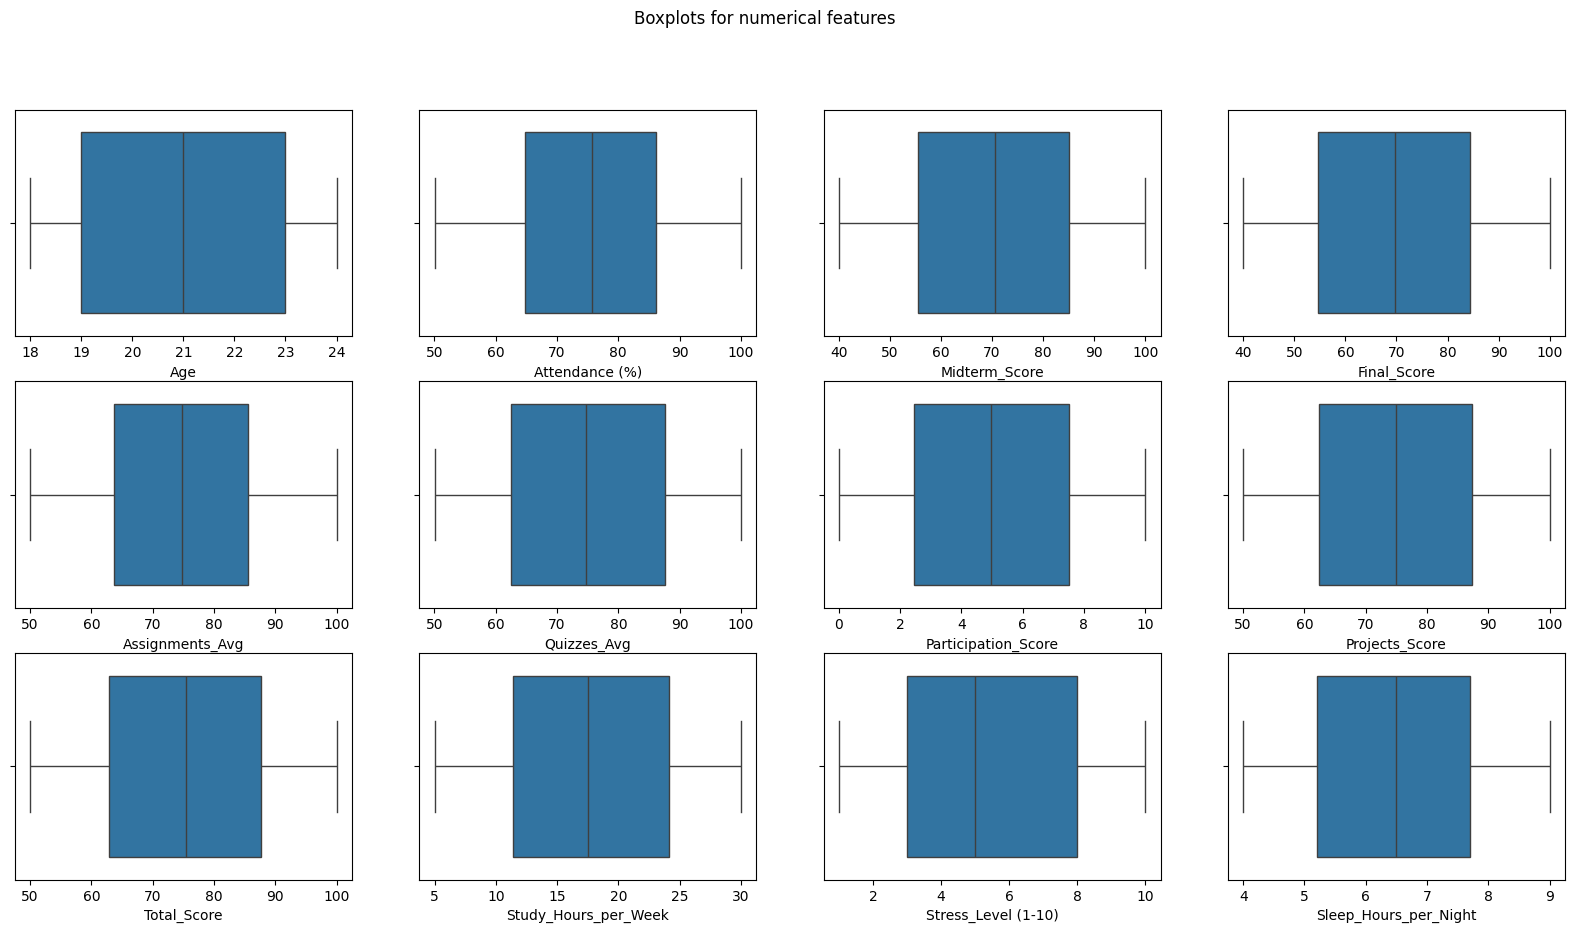

In [ ]:
fig , axes = plt.subplots(nrows=3,ncols=4,figsize=(20,10))
axes =axes.flatten()
for i in range (12) :
 sns.boxplot(data=df_copied, x= num_cols[i], ax= axes[i])
fig.suptitle('Boxplots for numerical features')

In [ ]:
cat_cols

Index(['First_Name', 'Last_Name', 'Email', 'Gender', 'Department', 'Grade',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level'],
      dtype='object')

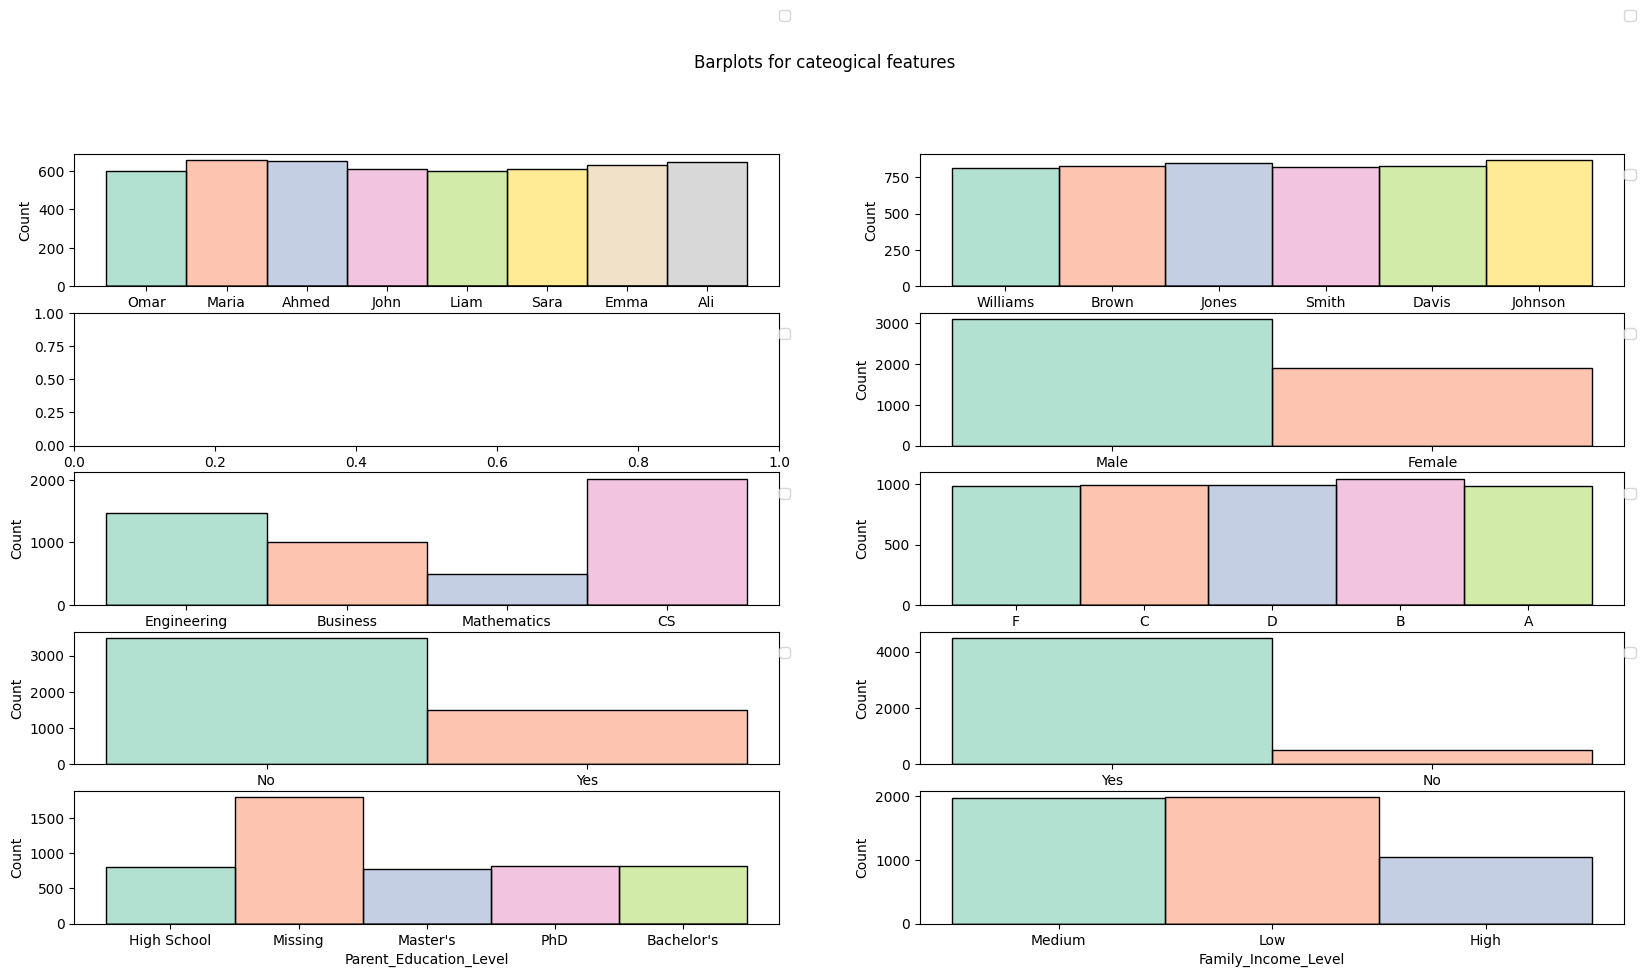

In [ ]:
fig , axes = plt.subplots(nrows =5, ncols=2 ,figsize=(20,10))
axes =axes.flatten()
for i in range (len(cat_cols)) :
  if i==2:
    continue
  else:
   sns.histplot(data=df_copied, x= cat_cols[i], ax= axes[i], palette= 'Set2',hue = cat_cols[i])
   axes[i].set_xlabel(cat_cols[i])
   axes[i].legend(loc= [1,2])
fig.suptitle('Barplots for cateogical features')
fig.tight_layout()